## This notebook simulates the inverse scattering algorithm


Auther: Mohammad Farsi
Email: mohammad.farsi1994@gmail.com

In [2]:
import torch
from components.channelmodel import ChannelModel
from components.invscattering import InverseScattering

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


### Inverse Scattering: Parameter Setting

In [4]:
# Parameters
num_segments = 10 # Num of segments
num_freq_samples = num_segments*2 # Num of samples in frequency domain must be at least (num_segments+1)

# Inverse Scattering

tau = 1 # group delay normalized to 1

# Channel Model Object
h0_input = torch.eye(2).to(torch.double) # input to the channel according to eq(25)
chan_model = ChannelModel(num_segments=num_segments, h_init=h0_input, device='cpu')
# Channel Params
true_params = chan_model.gen_rnd_channel_params() # it returns a dict with keys {'gamma','phi', 'psi', 'tau'}
true_params['gamma'] = 0.07+0.1*true_params['gamma'] # sets the PDL in range of  [0.3, 0.7] dB

(ht, hf) = chan_model.sample_freq_response(num_freq_samples, true_params)
# Inverse Scattering Model
inverse_scatering = InverseScattering(num_segments=num_segments, tau=tau) # Inverse Scattering Object
(h0_est) = inverse_scatering.inverse_scattering(ht)
estimated_params = inverse_scatering.get_params()

#### True vs estimated $\gamma$, $\phi$, and $\psi$

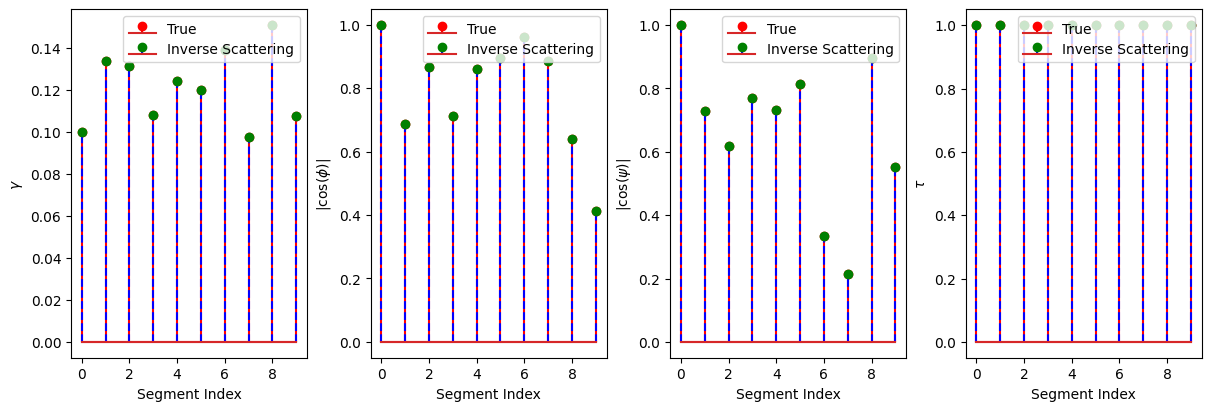

In [5]:
inverse_scatering.show_results(true_params, estimated_params)
